# Data Cleaning - Regression of Used Car Prices

In [1]:
# Instalación silenciosa de missingno
# (No muestra output)
%%capture
!pip install missingno #el signo de ! en !pip para decirle que es un comando


###Importamos las librerías necesarias para realiar nuestro procesamiento y limpieza de datos

In [2]:
# Importamos las librerías ensenciales
import pandas as pd # Para manejo de datos
import numpy as np # Para operaciones numéricas
import plotly as pl # Para visualizaciones interactivas
import seaborn as sns # Para gráficos estadísticos
import missingno as msno # Para visualizar datos faltantes

#1. Cargamos el dataset


In [9]:
# Carga del csv a dataframe
df = pd.read_csv('train.csv')

In [10]:
# Mostramos las primeras filas
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [11]:
# Voy a obtener un registro para ver y entender todos los valores de cada columna
record = df.iloc[0] # obtengo el primer registro
print(record)

id                                                         0
brand                                                   MINI
model                                          Cooper S Base
model_year                                              2007
milage                                                213000
fuel_type                                           Gasoline
engine          172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel
transmission                                             A/T
ext_col                                               Yellow
int_col                                                 Gray
accident                                       None reported
clean_title                                              Yes
price                                                   4200
Name: 0, dtype: object


In [12]:
#Info general del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [13]:
#Ver forma del dataframe
df.shape #filas, columnas

(188533, 13)

In [14]:
#Datos estadísticos para datos numéricos
df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


#2. Exploración de los tipos de datos
Antes de comenzar con cualquier análisis exploratorio, es fundamental examinar los tipos de datos de cada columna del dataset.
Esto nos permitirá:

Verificar que los campos tengan el tipo de dato correcto
Detectar columnas que requieran conversión (por ejemplo, fechas)
Identificar variables numéricas, categóricas y temporales
Anticipar posibles problemas durante el análisis estadístico
Para ello, utilizamos las funciones df.dtypes y df.info(), que proporcionan una visión general de la estructura del DataFrame.

In [15]:
print("Tipo de dato para cada columna:")
print(df.dtypes)

Tipo de dato para cada columna:
id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object


Para este proyecto hemos decidido convertir los tipos de datos object en category, ya que tenemos valores repetidos y nos servirá para entrenar el modelo de forma más óptima

In [21]:
# Obtenemos una lista de las columnas que queremos cambiar su tipo
cat_cols = [
    'brand','model','fuel_type','transmission',
    'ext_col','int_col','accident','clean_title'
]
# Cambiamos el tipo a category
df[cat_cols] = df[cat_cols].astype('category')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   id            188533 non-null  int64   
 1   brand         188533 non-null  category
 2   model         188533 non-null  category
 3   model_year    188533 non-null  int64   
 4   milage        188533 non-null  int64   
 5   fuel_type     183450 non-null  category
 6   engine        188533 non-null  object  
 7   transmission  188533 non-null  category
 8   ext_col       188533 non-null  category
 9   int_col       188533 non-null  category
 10  accident      186081 non-null  category
 11  clean_title   167114 non-null  category
 12  price         188533 non-null  int64   
dtypes: category(8), int64(4), object(1)
memory usage: 9.3+ MB


Análisis de valores faltantes o nulos


In [22]:
# df.count() Podemos ver los valores no nulos de cada columna
df.count()

,0
id,188533
brand,188533
model,188533
model_year,188533
milage,188533
fuel_type,183450
engine,188533
transmission,188533
ext_col,188533
int_col,188533


In [23]:
missing = df.isna().sum().sort_values(ascending=False) # Sumamos los valores nulos y los ordenamos de mayor a menor
missing_pct = (missing / len(df)) * 100 # Sacamos el porcentaje del total

pd.DataFrame({"missing": missing, "percent": missing_pct})


,missing,percent
clean_title,21419,11.360876
fuel_type,5083,2.696080
accident,2452,1.300568
brand,0,0.000000
id,0,0.000000
milage,0,0.000000
model_year,0,0.000000
model,0,0.000000
engine,0,0.000000
ext_col,0,0.000000


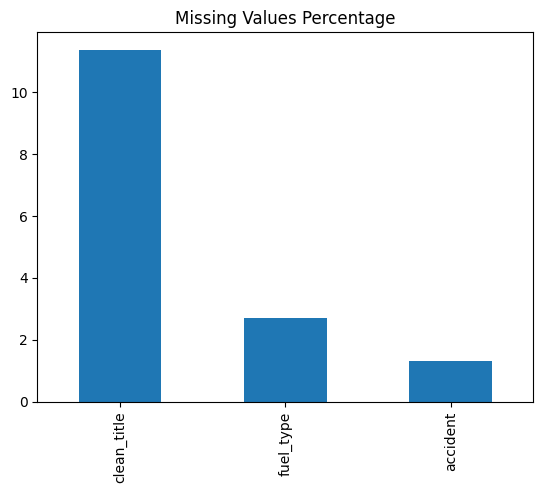

In [24]:
import matplotlib.pyplot as plt

# Mostramos
missing_pct[missing_pct > 0].plot(kind='bar')
plt.title("Missing Values Percentage")
plt.show()


Al solo tener solo 3 campos con datos faltantes y solo clean_title llega al 11 % hemos decidido imputar los datos, rellenando los valores faltantes por:

-clean_tittle 11% : "Unknown" -> (Yes,No,Unkown)

-fuel_type 2.7% : se rellenara con el valor más popular

-accident 1.3%: "Unknown"

Esto nos permite no dropear filas y perder datos valiosos para nuestro estudio

In [28]:
# For clean_title
#df['clean_title'] = df['clean_title'].cat.add_categories('Unknown')
df['clean_title'] = df['clean_title'].fillna('Unknown')

#Como obtener el valor más populas
# If your data has:
# Gasoline: 100,000 cars
# Diesel: 50,000 cars
# Electric: 30,000 cars
# Hybrid: 8,000 cars

df['fuel_type'].mode()     # Returns: 0    Gasoline (Series)
df['fuel_type'].mode()[0]  # Returns: Gasoline (string)

# For fuel_type
most_common_fuel = df['fuel_type'].mode()[0] # Guardamos el valor mas popular
df['fuel_type'] = df['fuel_type'].fillna(most_common_fuel) # Rellenamos los valores faltantes

# For accident
df['accident'] = df['accident'].cat.add_categories('Unknown')
df['accident'] = df['accident'].fillna('Unknown')

In [29]:
# Check for exact duplicates no existen duplicados
duplicates = df.duplicated()
print(f"Exact duplicates: {duplicates.sum()}")

Exact duplicates: 0


Añadiendo la columna "car_age"
En este paso hemos decidido añadir una columna nueva, donde obtendremos el tiempo que lleva un coche en el mercado

In [30]:
from datetime import datetime # Importación de las librerias para obtener la fecha

current_year = datetime.now().year # Guardamos la fecha en una variable
df['car_age'] = current_year - df['model_year'] # Creamos una columna donde restamos a la fecha actual el año del modelo del coche

# Verify it worked
print(df[['model_year', 'car_age']].head())
print(f"\nCar age range: {df['car_age'].min()} to {df['car_age'].max()} years")

   model_year  car_age
0        2007       19
1        2002       24
2        2002       24
3        2017        9
4        2021        5

Car age range: 2 to 52 years


#Columna Engine
Se realizó un proceso de limpieza y transformación de la columna engine, la cual contenía información combinada en formato de texto. Mediante el uso de expresiones regulares, se extrajeron tres variables numéricas relevantes para el modelado: potencia del motor (horsepower), tamaño del motor en litros, y número de cilindros.

🔍 Inspección de la Columna Engine

Se visualizaron las primeras filas de la columna engine para identificar el formato del texto y determinar qué variables podían extraerse posteriormente.



In [32]:
df['engine'].head()

,engine
0,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel
1,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel
2,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...
3,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel
4,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel


Se calculó el número de valores únicos en la columna engine para evaluar la diversidad de formatos y la complejidad del proceso de extracción


In [33]:
print(f"Number of unique values in 'engine' column: {df['engine'].nunique()}")

Number of unique values in 'engine' column: 1117


Se analizaron los valores más frecuentes de la columna engine junto con sus conteos para identificar patrones comunes y variaciones en el formato del texto.



In [34]:
print("Most frequent unique values in 'engine' column:")
print(df['engine'].value_counts().head(10))

Most frequent unique values in 'engine' column:
engine
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel             3462
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel             2902
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel             2841
2.0L I4 16V GDI DOHC Turbo                               2680
375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel            2451
340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel            2436
490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel             2187
455.0HP 6.2L 8 Cylinder Engine Gasoline Fuel             2138
425.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel    2134
300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel    2084
Name: count, dtype: int64


Se definió una expresión regular para identificar valores numéricos seguidos de “HP” y se aplicó sobre la columna engine para extraer la potencia del motor en una nueva variable numérica.


In [35]:
import re

# Expresión regular para buscar números seguidos de 'HP'
# Captura valores como: 172HP o 172.5HP
pattern_hp = r'(\d+\.?\d*)HP'

# Extraemos el valor de horsepower desde la columna 'engine'
# str.extract devuelve solo el número encontrado gracias al paréntesis ()
# [0] selects the first (and only) capturing group.
df['horsepower'] = df['engine'].str.extract(pattern_hp)[0]

# Convertimos la columna a tipo numérico
# Si algún valor no se puede convertir, se convierte en NaN
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Mostramos las primeras filas para verificar que se extrajo correctamente
print("DataFrame head with extracted horsepower:")
print(df[['engine', 'horsepower']].head())

DataFrame head with extracted horsepower:
                                              engine  horsepower
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel       172.0
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel       252.0
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...       320.0
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel       420.0
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel       208.0


Se verificó la cantidad de valores faltantes en la nueva columna horsepower y se calcularon estadísticas descriptivas para analizar su distribución y valores centrales, lo que permite evaluar la calidad de la extracción y decidir cómo tratar los datos faltantes.



In [36]:
print("Missing values in 'horsepower' column:")
print(df['horsepower'].isnull().sum())

print("\nDescriptive statistics for 'horsepower' column:")
print(df['horsepower'].describe())

Missing values in 'horsepower' column:
33259

Descriptive statistics for 'horsepower' column:
count    155274.000000
mean        343.263856
std         114.734210
min          70.000000
25%         263.000000
50%         329.000000
75%         416.000000
max        1020.000000
Name: horsepower, dtype: float64


El siguiente paso es extraer el tamaño del motor en litros de la columna 'engine' utilizando expresiones regulares. Esto implicará crear una nueva columna numérica para este dato, manejar los posibles valores faltantes convirtiendo los errores a 'NaN' y, finalmente, verificar la extracción mostrando las primeras filas del DataFrame. Todo esto se hace para cumplir con el requisito principal de la tarea de extraer información estructurada como el tamaño del motor



In [37]:
import re

# Patrón para capturar números seguidos de 'L' (litros)
pattern_engine_size = r'(\d+\.?\d*)L'

# Extraer tamaño del motor y crear nueva columna
df['engine_size_L'] = df['engine'].str.extract(pattern_engine_size)[0]

# Convertir a número, valores inválidos se vuelven NaN
df['engine_size_L'] = pd.to_numeric(df['engine_size_L'], errors='coerce')

# Verificar extracción mostrando las primeras filas
print("DataFrame head with extracted engine size (Liters):")
print(df[['engine', 'engine_size_L']].head())

DataFrame head with extracted engine size (Liters):
                                              engine  engine_size_L
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel            1.6
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel            3.9
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...            5.3
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel            5.0
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel            2.0


Ahora que hemos extraído 'engine_size_L', necesitamos revisar si hay valores faltantes para saber cuántos registros no tienen información del tamaño del motor y mostrar estadísticas descriptivas (como promedio, mínimo, máximo y desviación) para entender la distribución y completitud de los datos, de manera similar a cómo se analizó la columna 'horsepower'


In [38]:
print("Missing values in 'engine_size_L' column:")
print(df['engine_size_L'].isnull().sum())

print("\nDescriptive statistics for 'engine_size_L' column:")
print(df['engine_size_L'].describe())

Missing values in 'engine_size_L' column:
14214

Descriptive statistics for 'engine_size_L' column:
count    174319.000000
mean          3.806676
std           1.355945
min           0.650000
25%           3.000000
50%           3.500000
75%           4.800000
max           8.400000
Name: engine_size_L, dtype: float64


A continuación, necesitamos extraer el número de cilindros desde la columna 'engine' usando expresiones regulares, crear una nueva columna numérica para almacenar ese dato, manejar posibles valores faltantes convirtiéndolos en NaN si hay errores, y finalmente verificar la extracción mostrando las primeras filas del DataFrame, tal como se requiere para obtener información estructurada como el número de cilindros.


In [39]:
import re

# Patrón para capturar números seguidos de la palabra 'Cylinder'
# Busca uno o más dígitos antes de 'Cylinder'; los paréntesis capturan solo el número.
pattern_cylinders = r'(\d+)\s*Cylinder'

# Extraer el número de cilindros de la columna 'engine' y crear nueva columna
df['cylinders'] = df['engine'].str.extract(pattern_cylinders)[0]

# Convertir la columna 'cylinders' a tipo numérico; valores inválidos se vuelven NaN
df['cylinders'] = pd.to_numeric(df['cylinders'], errors='coerce')

# Verificar la extracción mostrando las primeras filas
print("DataFrame head with extracted number of cylinders:")
print(df[['engine', 'cylinders']].head())

DataFrame head with extracted number of cylinders:
                                              engine  cylinders
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel        4.0
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel        8.0
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...        8.0
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel        8.0
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel        4.0


Ahora que hemos extraído 'cylinders', necesitamos revisar si hay valores faltantes para identificar registros sin información del número de cilindros y mostrar estadísticas descriptivas (como promedio, mínimo, máximo y desviación) para entender la distribución y completitud de los datos, de manera similar a cómo se analizaron las columnas 'horsepower' y 'engine_size_L'



In [40]:
print("Missing values in 'cylinders' column:")
print(df['cylinders'].isnull().sum())

print("\nDescriptive statistics for 'cylinders' column:")
print(df['cylinders'].describe())

Missing values in 'cylinders' column:
37855

Descriptive statistics for 'cylinders' column:
count    150678.000000
mean          6.374268
std           1.554579
min           3.000000
25%           6.000000
50%           6.000000
75%           8.000000
max          12.000000
Name: cylinders, dtype: float64


Necesito visualizar la distribución de las nuevas columnas numéricas extraídas: 'horsepower', 'engine_size_L' y 'cylinders', para comprender sus características, tal como solicita la tarea principal. Para esto, los histogramas son la herramienta más adecuada.



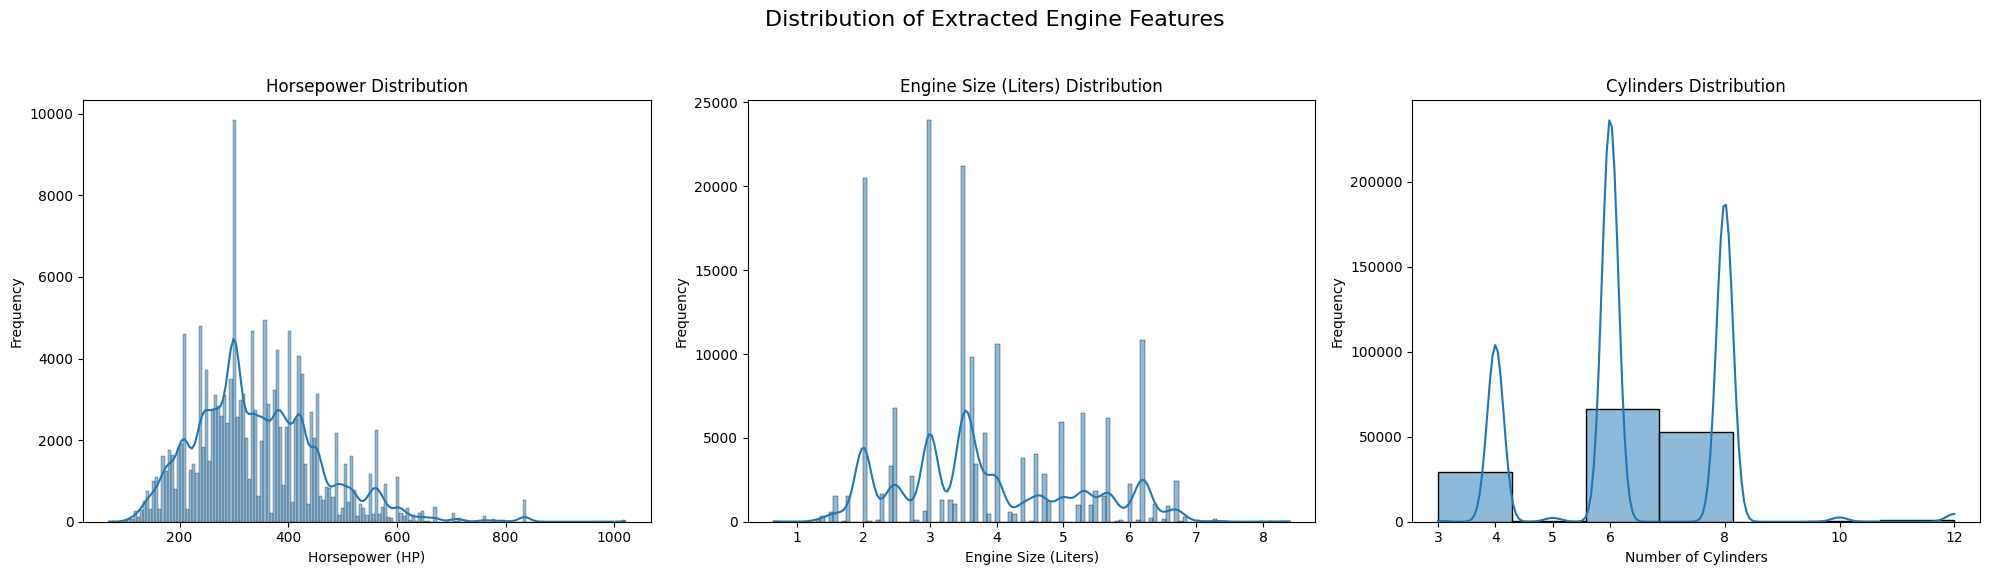

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distribution of Extracted Engine Features', fontsize=16)

# Plot distribution of horsepower
sns.histplot(df['horsepower'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Horsepower Distribution')
axes[0].set_xlabel('Horsepower (HP)')
axes[0].set_ylabel('Frequency')

# Plot distribution of engine_size_L
sns.histplot(df['engine_size_L'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Engine Size (Liters) Distribution')
axes[1].set_xlabel('Engine Size (Liters)')
axes[1].set_ylabel('Frequency')

# Plot distribution of cylinders
sns.histplot(df['cylinders'].dropna(), kde=True, ax=axes[2], bins=len(df['cylinders'].unique())-1)
axes[2].set_title('Cylinders Distribution')
axes[2].set_xlabel('Number of Cylinders')
axes[2].set_ylabel('Frequency')
axes[2].set_xticks(sorted(df['cylinders'].dropna().unique()))

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

Resumen de la Extracción y Limpieza de las Características del Motor

En esta sección nos centramos en extraer y limpiar características numéricas de la columna engine del DataFrame df. El proceso incluyó los siguientes pasos clave:

Exploración de la columna 'engine': Se analizó inicialmente la columna 'engine', que es de tipo texto y contiene información de potencia (horsepower), tamaño del motor y número de cilindros. Se observó una gran cantidad de valores únicos, lo que requería una estrategia de extracción robusta.

Extracción de Horsepower: Se usaron expresiones regulares para identificar y extraer los valores numéricos que aparecen justo antes de 'HP'. Luego se convirtieron a tipo numérico, convirtiendo los errores en NaN. Se revisaron los valores faltantes y estadísticas descriptivas para entender la completitud y distribución de los datos.

Extracción del Tamaño del Motor (Litros): De manera similar a la potencia, se emplearon expresiones regulares para extraer los números seguidos de 'L'. Se convirtieron a tipo numérico, y se analizaron los valores faltantes y estadísticas descriptivas.

Extracción del Número de Cilindros: Se utilizaron expresiones regulares para extraer los valores numéricos antes de 'Cylinder'. Estos valores se convirtieron a tipo numérico y se revisó su completitud y distribución mediante conteo de valores faltantes y estadísticas descriptivas.

Visualización de Distribuciones: Finalmente, se generaron histogramas para cada columna numérica nueva ('horsepower', 'engine_size_L' y 'cylinders') para inspeccionar visualmente sus distribuciones, identificar posibles valores atípicos y comprender sus características generales.

## Manejar Valores Faltantes en Nuevas Columnas



Necesito calcular la mediana de cada una de las nuevas columnas numéricas ('horsepower', 'engine_size_L' y 'cylinders') y luego usar estas medianas para llenar los valores faltantes en sus respectivas columnas, siguiendo las instrucciones iniciales. Finalmente, se verificará la imputación revisando si todavía existen valores nulos.



In [46]:
print("Filling missing values with median for 'horsepower', 'engine_size_L', and 'cylinders'...")

# Calculate the median for each column
median_horsepower = df['horsepower'].median()
median_engine_size_L = df['engine_size_L'].median()
median_cylinders = df['cylinders'].median()

# Fill NaN values with the calculated medians
df['horsepower'].fillna(median_horsepower, inplace=True)
df['engine_size_L'].fillna(median_engine_size_L, inplace=True)
df['cylinders'].fillna(median_cylinders, inplace=True)

print(f"Missing values in 'horsepower' after imputation: {df['horsepower'].isnull().sum()}")
print(f"Missing values in 'engine_size_L' after imputation: {df['engine_size_L'].isnull().sum()}")
print(f"Missing values in 'cylinders' after imputation: {df['cylinders'].isnull().sum()}")

Filling missing values with median for 'horsepower', 'engine_size_L', and 'cylinders'...
Missing values in 'horsepower' after imputation: 0
Missing values in 'engine_size_L' after imputation: 0
Missing values in 'cylinders' after imputation: 0


/tmp/ipython-input-1890872957.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(median_horsepower, inplace=True)
/tmp/ipython-input-1890872957.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

El código anterior generó un FutureWarning por el uso de inplace=True junto con asignación encadenada. Para evitar este aviso y asegurar compatibilidad con futuras versiones de pandas, modificaré las llamadas a fillna para asignar directamente el resultado a las columnas del DataFrame en lugar de usar inplace=True.



In [44]:
print("Filling missing values with median for 'horsepower', 'engine_size_L', and 'cylinders'...")

# Calculate the median for each column
median_horsepower = df['horsepower'].median()
median_engine_size_L = df['engine_size_L'].median()
median_cylinders = df['cylinders'].median()

# Fill NaN values with the calculated medians
df['horsepower'] = df['horsepower'].fillna(median_horsepower)
df['engine_size_L'] = df['engine_size_L'].fillna(median_engine_size_L)
df['cylinders'] = df['cylinders'].fillna(median_cylinders)

print(f"Missing values in 'horsepower' after imputation: {df['horsepower'].isnull().sum()}")
print(f"Missing values in 'engine_size_L' after imputation: {df['engine_size_L'].isnull().sum()}")
print(f"Missing values in 'cylinders' after imputation: {df['cylinders'].isnull().sum()}")

Filling missing values with median for 'horsepower', 'engine_size_L', and 'cylinders'...
Missing values in 'horsepower' after imputation: 0
Missing values in 'engine_size_L' after imputation: 0
Missing values in 'cylinders' after imputation: 0


## Visualizar Nuevas Características




Necesito crear una visualización completa de la distribución de las columnas 'horsepower', 'engine_size_L' y 'cylinders', incluyendo histogramas y diagramas de caja (boxplots), para evaluar sus distribuciones e identificar posibles valores atípicos, siguiendo las instrucciones de la subtarea.



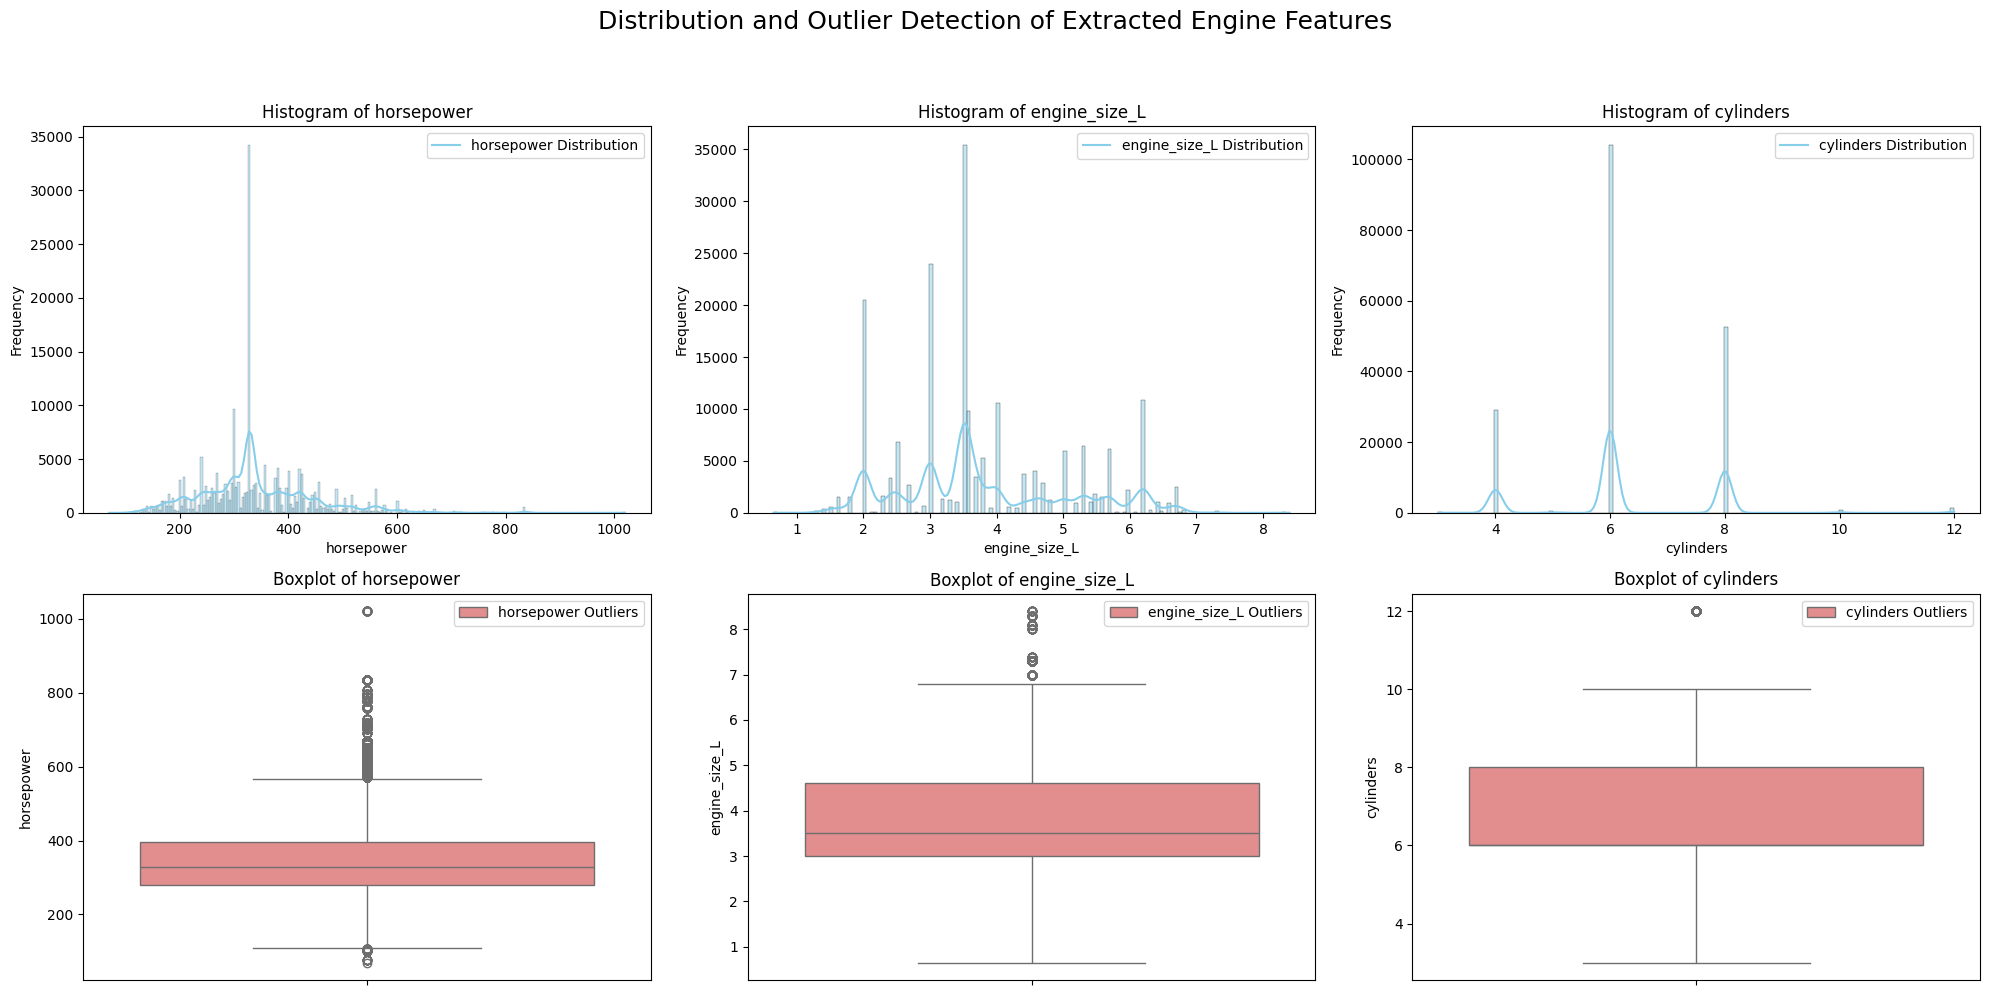

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to visualize
features = ['horsepower', 'engine_size_L', 'cylinders']

# Set up the figure and axes for 2 rows (histograms and boxplots) and 3 columns (for each feature)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
fig.suptitle('Distribution and Outlier Detection of Extracted Engine Features', fontsize=18, y=1.02)

for i, feature in enumerate(features):
    # Histogram with KDE in the first row
    sns.histplot(df[feature], kde=True, ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f'Histogram of {feature}')
    axes[0, i].set_xlabel(feature)
    axes[0, i].set_ylabel('Frequency')
    axes[0, i].legend([f'{feature} Distribution'], loc='upper right')

    # Boxplot in the second row
    sns.boxplot(y=df[feature], ax=axes[1, i], color='lightcoral')
    axes[1, i].set_title(f'Boxplot of {feature}')
    axes[1, i].set_ylabel(feature)
    axes[1, i].legend([f'{feature} Outliers'], loc='upper right')

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust rect to make space for suptitle
plt.show()

## Resumen de la Extracción y Limpieza de Características del Motor

Esta sección se centró en la extracción y limpieza de características numéricas de la columna `engine` en el DataFrame `df`. El proceso involucró los siguientes pasos clave:

1.  **Exploración de la columna 'engine'**: Un análisis inicial de la columna 'engine' reveló su naturaleza basada en cadenas de texto, que contenía información sobre la potencia (HP), el tamaño del motor (Litros) y el número de cilindros. Se observó un gran número de valores únicos, lo que exigió una estrategia de extracción robusta.

2.  **Extracción de Caballos de Fuerza (HP)**: Se utilizaron expresiones regulares para identificar y extraer los valores numéricos que precedían inmediatamente a 'HP'. Los valores extraídos se convirtieron luego a un tipo de dato numérico, donde los errores se coercionaron a `NaN`. Se revisaron los valores faltantes y las estadísticas descriptivas para comprender la completitud y distribución de los datos.

3.  **Extracción del Tamaño del Motor (Litros)**: De manera similar a la potencia, se emplearon expresiones regulares para extraer los valores numéricos seguidos de 'L' (para Litros). Estos se convirtieron a un tipo numérico, y se examinaron los valores faltantes junto con las estadísticas descriptivas.

4.  **Extracción del Número de Cilindros**: Nuevamente se utilizaron expresiones regulares para extraer los valores numéricos que precedían a 'Cylinder'. Los valores extraídos se convirtieron a un tipo de dato numérico, y su completitud y distribución se analizaron mediante el recuento de valores faltantes y las estadísticas descriptivas.

5.  **Manejo de Valores Faltantes en Nuevas Columnas**: Se calculó la mediana para cada una de las nuevas columnas numéricas ('horsepower', 'engine_size_L', 'cylinders') y se utilizó para rellenar los valores faltantes en sus respectivas columnas. Esto aseguró que no hubiera valores nulos en estas características, lo que es crucial para el análisis y modelado subsiguientes.

6.  **Visualización de Distribuciones**: Finalmente, se generaron histogramas con estimación de densidad de kernel (KDE) y boxplots para cada una de las columnas numéricas recién creadas ('horsepower', 'engine_size_L' y 'cylinders'). Esto permitió inspeccionar visualmente sus distribuciones, identificar posibles valores atípicos y comprender sus características generales después de la imputación.

## Eliminar Columna 'engine' Original

### Subtask:
Remover la columna 'engine' original del DataFrame, ya que su información ha sido extraída y estructurada en nuevas columnas ('horsepower', 'engine_size_L', 'cylinders'), para evitar redundancia y optimizar el DataFrame.


**Reasoning**:
The subtask requires removing the original 'engine' column. I will use the `df.drop()` method to achieve this, specifying `axis=1` to indicate a column drop and `inplace=True` to modify the DataFrame directly.



In [47]:
print("Removing the original 'engine' column...")
df.drop('engine', axis=1, inplace=True)

# Verify the column has been removed
print("DataFrame columns after dropping 'engine':")
print(df.columns)

Removing the original 'engine' column...
DataFrame columns after dropping 'engine':
Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'car_age', 'horsepower', 'engine_size_L', 'cylinders'],
      dtype='object')


**Reasoning**:
After removing the 'engine' column, the main task requires a final review of the DataFrame's structure and data types using `df.info()` and `df.head()` to ensure all previous transformations are correctly applied and the DataFrame is ready for EDA.



In [49]:
print("Final review of DataFrame structure and data types:")
df.info()
print("\nFirst 5 rows of the cleaned DataFrame:")
df.head()

Final review of DataFrame structure and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   id             188533 non-null  int64   
 1   brand          188533 non-null  category
 2   model          188533 non-null  category
 3   model_year     188533 non-null  int64   
 4   milage         188533 non-null  int64   
 5   fuel_type      188533 non-null  category
 6   transmission   188533 non-null  category
 7   ext_col        188533 non-null  category
 8   int_col        188533 non-null  category
 9   accident       188533 non-null  category
 10  clean_title    188533 non-null  category
 11  price          188533 non-null  int64   
 12  car_age        188533 non-null  int64   
 13  horsepower     188533 non-null  float64 
 14  engine_size_L  188533 non-null  float64 
 15  cylinders      188533 non-null  float64 
dtypes: c

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,car_age,horsepower,engine_size_L,cylinders
0,0,MINI,Cooper S Base,2007,213000,Gasoline,A/T,Yellow,Gray,None reported,Yes,4200,19,172.0,1.6,4.0
1,1,Lincoln,LS V8,2002,143250,Gasoline,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,24,252.0,3.9,8.0
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,A/T,Blue,Gray,None reported,Yes,13900,24,320.0,5.3,8.0
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,9,420.0,5.0,8.0
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,7-Speed A/T,Black,Beige,None reported,Yes,97500,5,208.0,2.0,4.0


## Identificar Outliers con IQR

La tarea consiste en identificar y tratar los valores atípicos (outliers) en las columnas 'milage', 'price', 'car_age', 'horsepower', 'engine_size_L' y 'cylinders' del DataFrame usando el método del rango intercuartílico (IQR). Este método implica calcular los límites inferior y superior y luego aplicar capping, reemplazando los valores extremos por esos límites

La subtarea requiere identificar los outliers usando el método del IQR para las columnas numéricas especificadas. Definiré la lista de características y luego iteraré sobre cada una para calcular e imprimir el Q1, Q3, IQR, límite inferior y límite superior de cada columna.



## Identificar y Calcular Límites IQR

### Subtask:
Calcular el primer cuartil (Q1), el tercer cuartil (Q3), el Rango Intercuartílico (IQR), y los límites superior e inferior para la detección de outliers en las columnas 'milage', 'price', 'car_age', 'horsepower', 'engine_size_L' y 'cylinders'.


In [55]:
# Creamos una lista de las columnas que queremos comprobar los outliers
numerical_cols_outliers = [
    'milage', 'price', 'car_age', 'horsepower', 'engine_size_L', 'cylinders'
]
# Creamos un diccionario
iqr_bounds = {}

print("Calculating IQR bounds and outlier counts for specified numerical columns:")
print("----------------------------------------------------------------------")

for col in numerical_cols_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    iqr_bounds[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

    print(f"\nColumn: {col}")
    print(f"  Q1: {Q1:.2f}")
    print(f"  Q3: {Q3:.2f}")
    print(f"  IQR: {IQR:.2f}")
    print(f"  Lower Bound (Q1 - 1.5*IQR): {lower_bound:.2f}")
    print(f"  Upper Bound (Q3 + 1.5*IQR): {upper_bound:.2f}")

    # Count outliers
    lower_outliers = df[df[col] < lower_bound].shape[0]
    upper_outliers = df[df[col] > upper_bound].shape[0]
    total_outliers = lower_outliers + upper_outliers
    total_data_points = df.shape[0]
    percentage_outliers = (total_outliers / total_data_points) * 100

    print(f"  Number of lower outliers: {lower_outliers}")
    print(f"  Number of upper outliers: {upper_outliers}")
    print(f"  Total outliers: {total_outliers} ({percentage_outliers:.2f}% of total data points)")

print("----------------------------------------------------------------------")

Calculating IQR bounds and outlier counts for specified numerical columns:
----------------------------------------------------------------------

Column: milage
  Q1: 24115.00
  Q3: 95400.00
  IQR: 71285.00
  Lower Bound (Q1 - 1.5*IQR): -82812.50
  Upper Bound (Q3 + 1.5*IQR): 202327.50
  Number of lower outliers: 0
  Number of upper outliers: 0
  Total outliers: 0 (0.00% of total data points)

Column: price
  Q1: 17000.00
  Q3: 49900.00
  IQR: 32900.00
  Lower Bound (Q1 - 1.5*IQR): -32350.00
  Upper Bound (Q3 + 1.5*IQR): 99250.00
  Number of lower outliers: 0
  Number of upper outliers: 0
  Total outliers: 0 (0.00% of total data points)

Column: car_age
  Q1: 6.00
  Q3: 13.00
  IQR: 7.00
  Lower Bound (Q1 - 1.5*IQR): -4.50
  Upper Bound (Q3 + 1.5*IQR): 23.50
  Number of lower outliers: 0
  Number of upper outliers: 0
  Total outliers: 0 (0.00% of total data points)

Column: horsepower
  Q1: 280.00
  Q3: 395.00
  IQR: 115.00
  Lower Bound (Q1 - 1.5*IQR): 107.50
  Upper Bound (Q3 + 1.5*

## Visualizar Outliers (Pre-tratamiento)




En esta subtarea vamos a visualizar los outliers de varias columnas numéricas usando boxplots. Primero definimos las columnas a analizar, luego configuramos subplots para mostrar varios gráficos juntos, iteramos sobre cada columna dibujando su boxplot y, finalmente, mostramos todos los gráficos para observar la distribución y detectar posibles valores extremos antes del tratamiento.



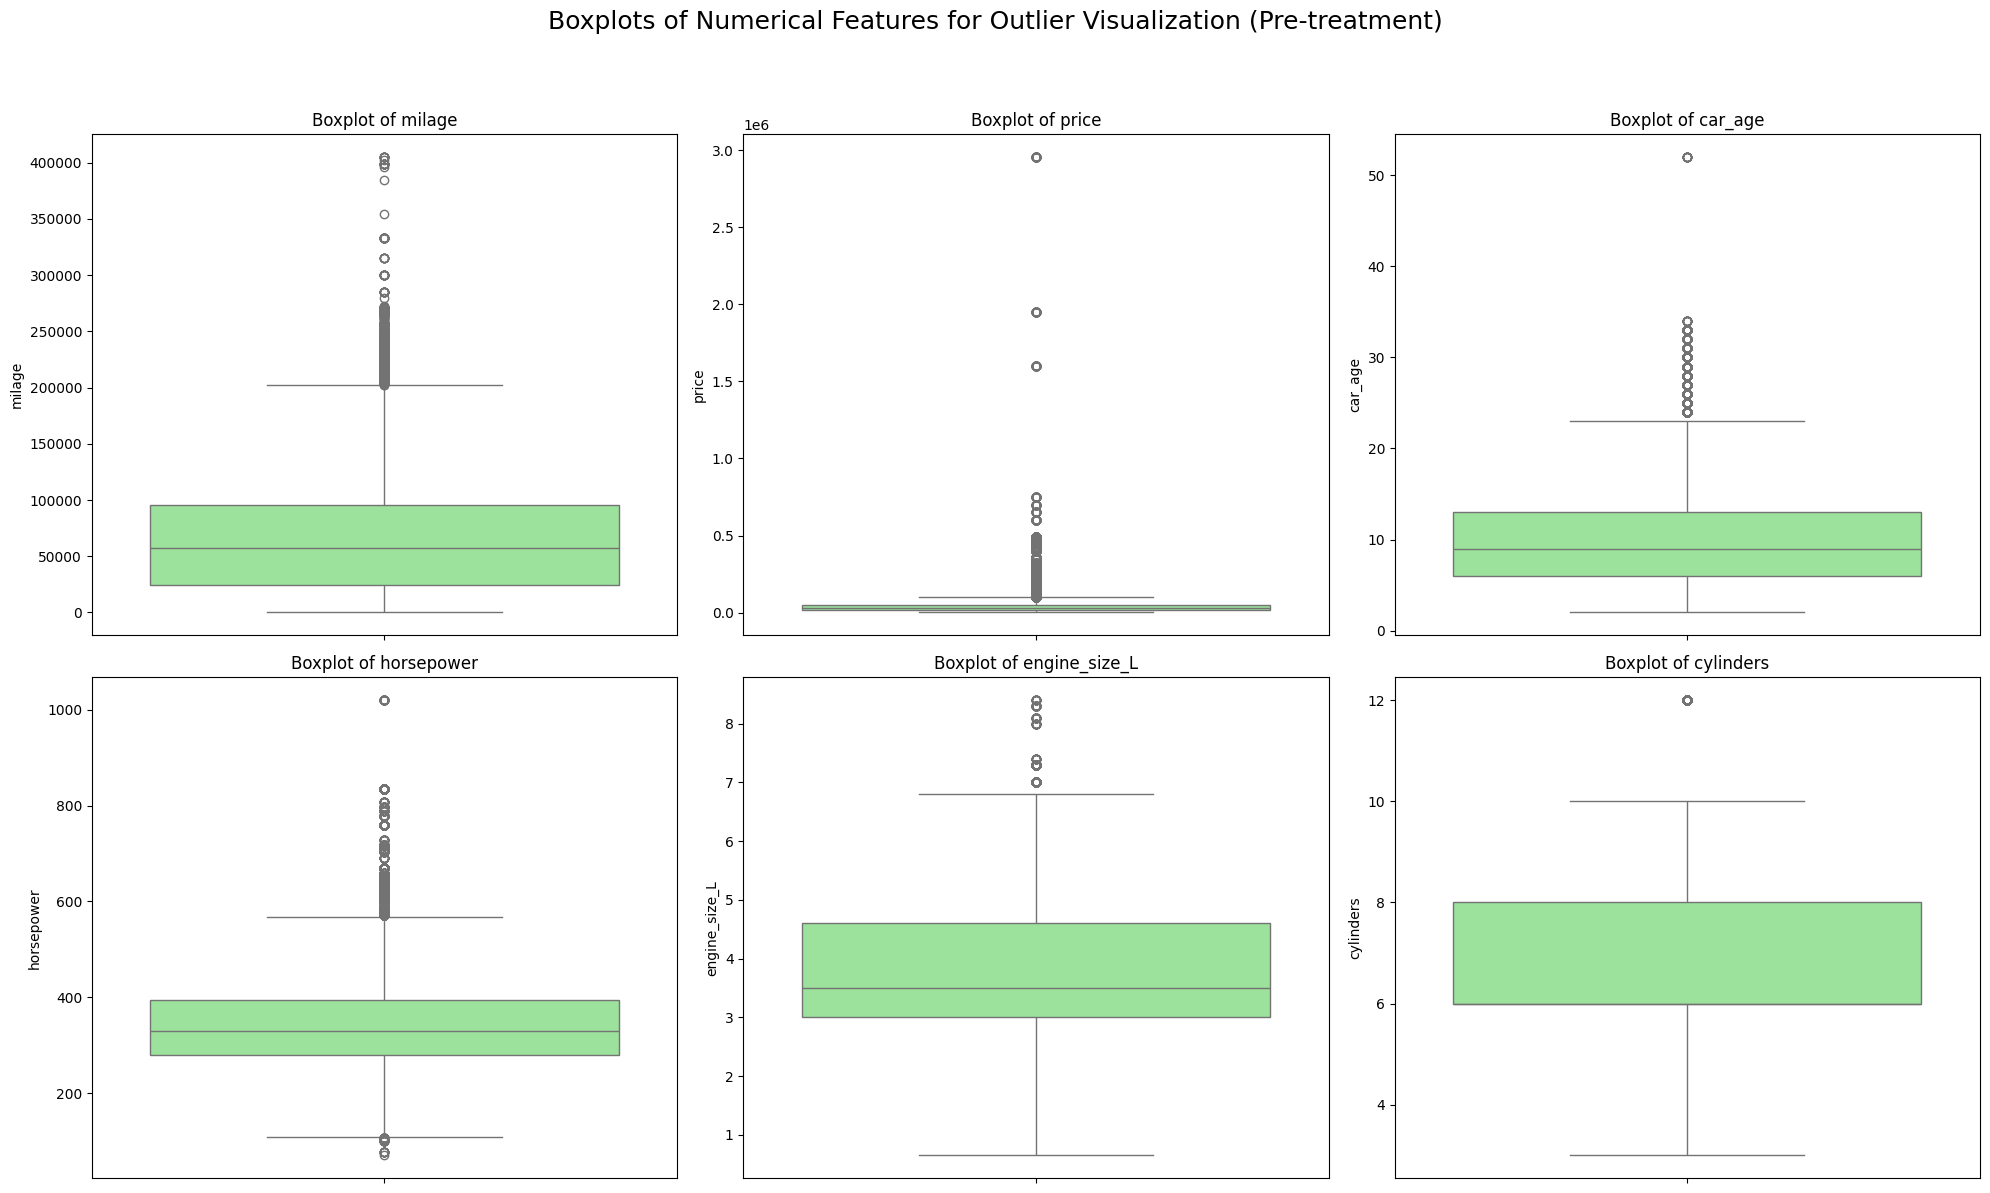

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns for outlier visualization
numerical_cols_outliers = [
    'milage', 'price', 'car_age', 'horsepower', 'engine_size_L', 'cylinders'
]

# Set up the figure and axes for 2 rows and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
fig.suptitle('Boxplots of Numerical Features for Outlier Visualization (Pre-treatment)', fontsize=18, y=1.02)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each column and create a boxplot
for i, col in enumerate(numerical_cols_outliers):
    sns.boxplot(y=df[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust rect to make space for suptitle
plt.show()

## Aplicar Capping para Outliers

Capping es una técnica para tratar los valores atípicos (outliers) en un conjunto de datos, sin eliminarlos. En lugar de borrar los outliers, se reemplazan por un valor límite para que no distorsionen el análisis o los modelos estadísticos.

La subtarea requiere aplicar capping a los outliers en las columnas numéricas especificadas. Para ello, se iterará sobre cada columna, se obtendrán sus límites calculados con el IQR y se reemplazarán los valores que estén fuera de esos límites por el límite superior o inferior correspondiente.



In [56]:
print("Applying capping to outliers in numerical columns...")

for col in numerical_cols_outliers:
    # Retrieve the bounds for the current column
    lower_bound = iqr_bounds[col]['lower_bound']
    upper_bound = iqr_bounds[col]['upper_bound']

    # Apply capping
    df[col] = np.clip(df[col], lower_bound, upper_bound)

print("Capping applied successfully to all specified numerical columns.")

Applying capping to outliers in numerical columns...
Capping applied successfully to all specified numerical columns.


## Visualizar Outliers (Post-tratamiento)

La subtarea requiere generar nuevos boxplots de las columnas numéricas especificadas después de aplicar capping, para visualizar cómo afectó el tratamiento a los outliers. Usaré la lista de columnas ya definida y crearé los gráficos con Seaborn y Matplotlib


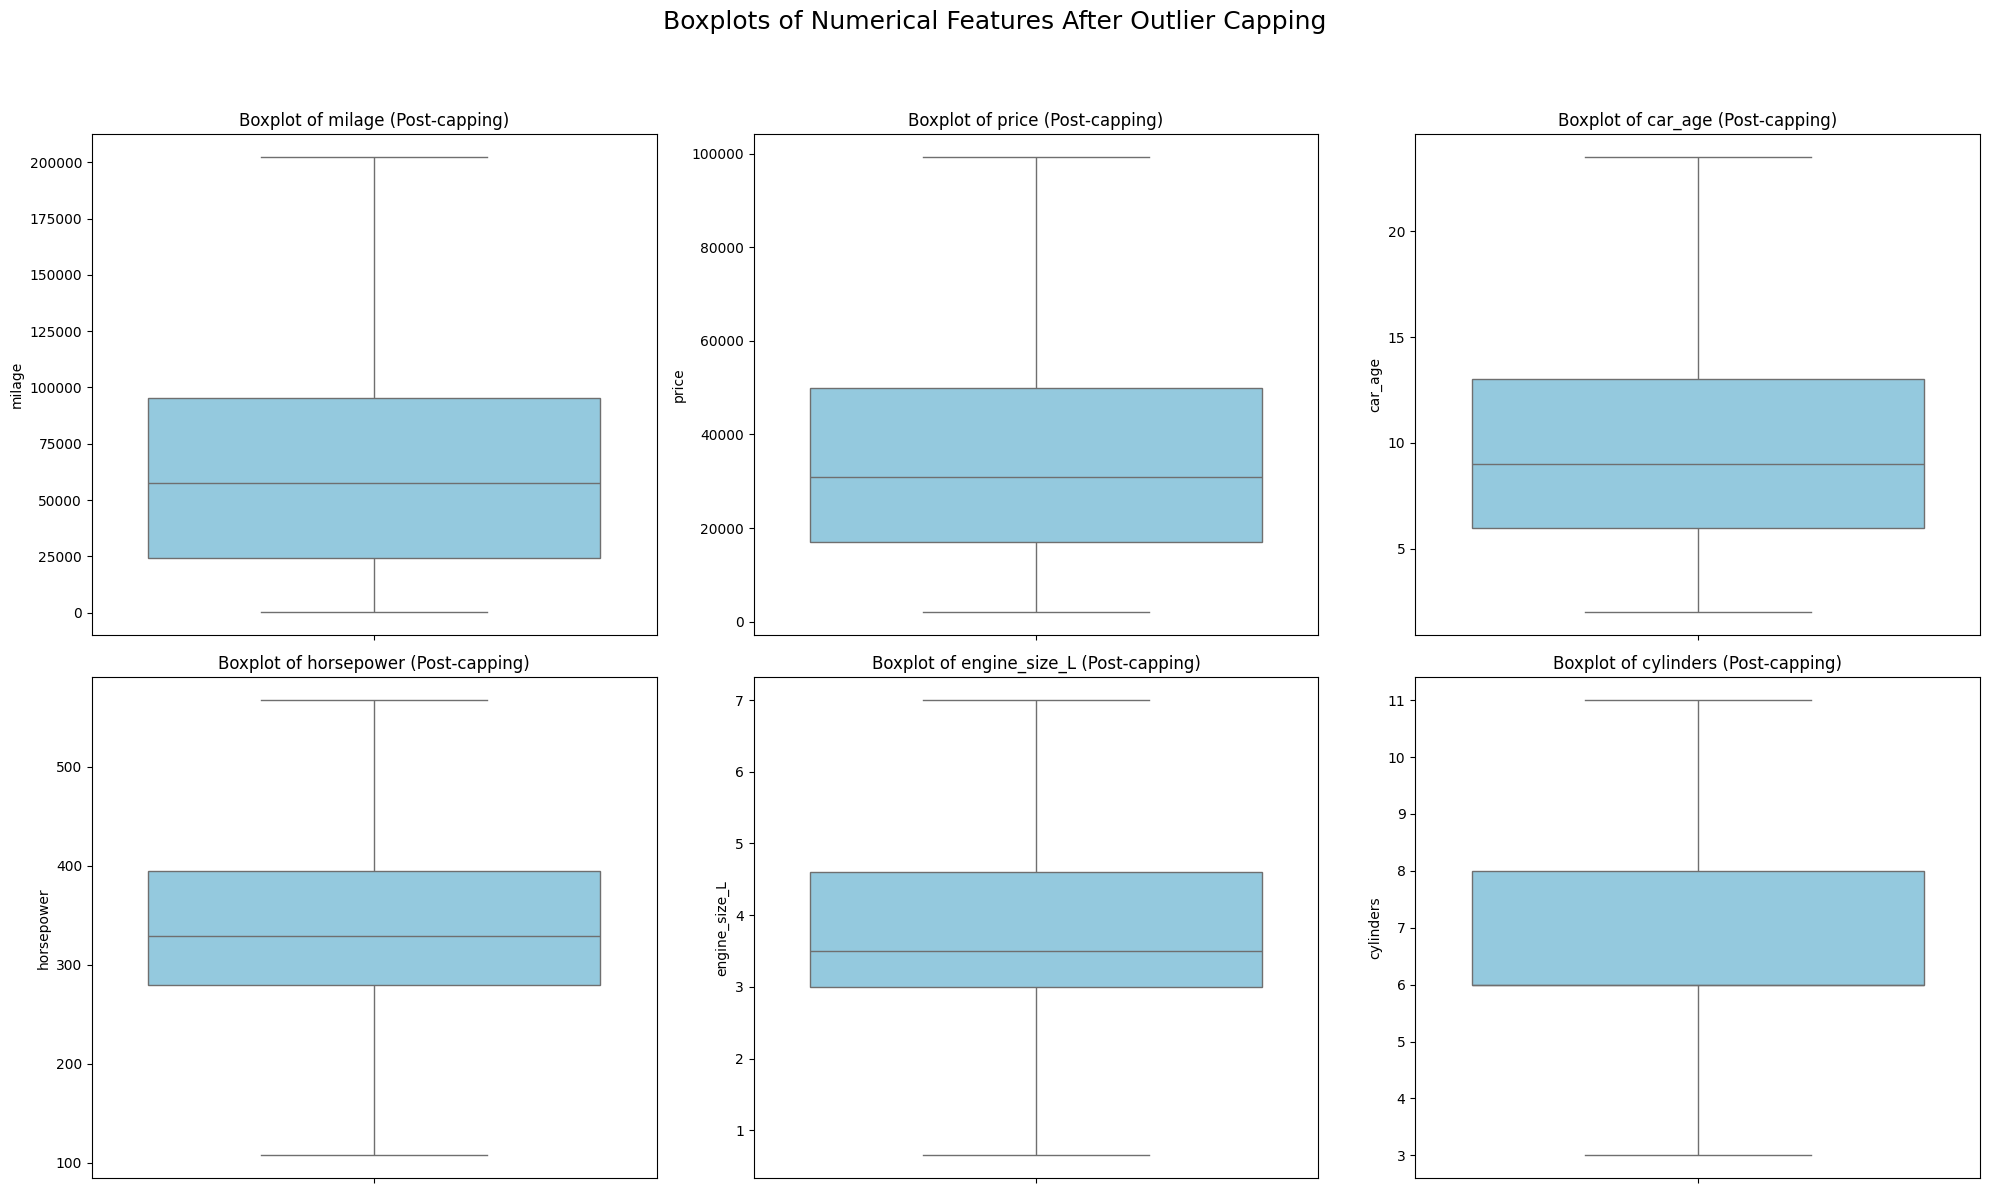

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns for outlier visualization (after capping)
numerical_cols_outliers = [
    'milage', 'price', 'car_age', 'horsepower', 'engine_size_L', 'cylinders'
]

# Set up the figure and axes for 2 rows and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
fig.suptitle('Boxplots of Numerical Features After Outlier Capping', fontsize=18, y=1.02)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each column and create a boxplot
for i, col in enumerate(numerical_cols_outliers):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {col} (Post-capping)')
    axes[i].set_ylabel(col)

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust rect to make space for suptitle
plt.show()

## Revisar Estadísticas Descriptivas Post-tratamiento


Mostrar las estadísticas descriptivas (`df.describe()`) de las columnas numéricas afectadas después del tratamiento de outliers para evaluar el impacto en medidas como la media, desviación estándar, y los rangos de valores.


In [54]:
print("Descriptive statistics for numerical columns after outlier capping:")
df[numerical_cols_outliers].describe()

Descriptive statistics for numerical columns after outlier capping:


,milage,price,car_age,horsepower,engine_size_L,cylinders
count,188533.000000,188533.000000,188533.000000,188533.000000,188533.000000,188533.000000
mean,65397.767531,37203.735537,10.095055,338.395846,3.782440,6.292405
std,48748.009000,25835.226624,5.444858,96.924358,1.303176,1.372608
min,100.000000,2000.000000,2.000000,107.500000,0.650000,3.000000
25%,24115.000000,17000.000000,6.000000,280.000000,3.000000,6.000000
50%,57785.000000,30825.000000,9.000000,329.000000,3.500000,6.000000
75%,95400.000000,49900.000000,13.000000,395.000000,4.600000,8.000000
max,202327.500000,99250.000000,23.500000,567.500000,7.000000,11.000000


## Resumen Completo de la Limpieza y Transformación de Datos

Este notebook ha ejecutado una serie de pasos de limpieza y transformación de datos para preparar el dataset de precios de coches usados para un Análisis Exploratorio de Datos (EDA) exhaustivo y la construcción de modelos.

### 1. Carga e Inspección Inicial de Datos:
- El dataset `train.csv` fue cargado en un DataFrame de pandas `df`.
- Se realizaron inspecciones iniciales con `df.head()`, `df.info()`, `df.shape` y `df.describe()` para entender la estructura básica, los tipos de datos y las estadísticas resumidas.

### 2. Conversión de Tipos de Datos:
- Varias columnas de tipo 'object' (`brand`, `model`, `fuel_type`, `transmission`, `ext_col`, `int_col`, `accident`, `clean_title`) se convirtieron al tipo de dato 'category' para optimizar el uso de memoria y facilitar operaciones categóricas más eficientes.

### 3. Manejo de Valores Faltantes:
- Se identificaron y cuantificaron los valores faltantes. Para `clean_title` y `accident`, los `NaN` se imputaron con el string 'Unknown'. Para `fuel_type`, los `NaN` se rellenaron con el valor más frecuente (moda), que fue 'Gasoline'.

### 4. Verificación de Duplicados:
- Se realizó una verificación de duplicados exactos (`df.duplicated().sum()`), confirmando que no había filas idénticas en el dataset.

### 5. Ingeniería de Características - Edad del Coche (`car_age`):
- Se creó una nueva característica numérica, `car_age`, restando el `model_year` del año actual (2026 en el momento de la ejecución), proporcionando una medida directa de la antigüedad del vehículo.

### 6. Transformación Detallada de la Columna 'engine':
- La columna original 'engine', que contenía información textual combinada, fue procesada utilizando expresiones regulares para extraer tres nuevas características numéricas:
    - **`horsepower`**: Valores numéricos seguidos de 'HP' (caballos de fuerza).
    - **`engine_size_L`**: Valores numéricos seguidos de 'L' (tamaño del motor en litros).
    - **`cylinders`**: Valores numéricos que preceden a 'Cylinder' (número de cilindros).
- Las nuevas columnas extraídas se convirtieron a tipo flotante. Los valores faltantes resultantes de la extracción se imputaron con la mediana de cada columna (`horsepower` mediana: 329.0, `engine_size_L` mediana: 3.5, `cylinders` mediana: 6.0).
- La columna original 'engine' fue eliminada del DataFrame, ya que su información relevante se estructuró en las nuevas características.

### 7. Detección y Tratamiento de Outliers (Capping):
- Se identificaron los outliers en las columnas numéricas clave (`milage`, `price`, `car_age`, `horsepower`, `engine_size_L`, `cylinders`) utilizando el método del Rango Intercuartílico (IQR). Se calcularon los límites inferior y superior.
- Se aplicó **capping**: los valores por debajo del límite inferior se reemplazaron por este, y los valores por encima del límite superior se reemplazaron por este. Esto mitigó la influencia de valores extremos sin eliminar puntos de datos.
- Se generaron boxplots antes y después del capping, y se revisaron las estadísticas descriptivas para confirmar el impacto del tratamiento en la distribución de los datos.

### 8. Revisión Final del DataFrame:
- Una revisión final de la estructura y tipos de datos del DataFrame con `df.info()` y `df.head()` confirmó que todas las transformaciones se aplicaron correctamente y que el DataFrame está ahora limpio, estructurado y listo para el análisis.

El DataFrame actual se encuentra en un estado óptimo para iniciar el Análisis Exploratorio de Datos (EDA), con tipos de datos adecuados, sin valores faltantes y con los outliers tratados, lo que asegura la robustez de los análisis subsiguientes.

## Exportar DataFrame Limpio a CSV

Exportamos el DataFrame `df` a un nuevo archivo CSV llamado `cleaned_train.csv`. Esto asegurará que todas las transformaciones y limpiezas realizadas en este notebook se guarden para ser utilizadas en el Análisis Exploratorio de Datos (EDA) o en la fase de modelado, sin necesidad de repetir los pasos.

In [57]:
# Exportar el DataFrame a un archivo CSV
df.to_csv('cleaned_train.csv', index=False)

print("DataFrame exportado exitosamente a 'cleaned_train.csv'")

DataFrame exportado exitosamente a 'cleaned_train.csv'
